# **BoomBikes Bike-sharing Assignment: Applying Multiple Linear Regression**

## **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## **Step 1: Import Required Libraries and Packages**

In [4]:
# Data Handling and Analysis Libraries
import numpy as np
import pandas as pd
import calendar

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis and Model Diagnostics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning and Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Suppress Warnings for Cleaner Output
import warnings
warnings.filterwarnings('ignore')

## **Step 2: Data understanding, Preparation and EDA**

#### Load Bike dataset

In [7]:
# Loading the bike data using Pandas' read_csv function
bike_data = pd.read_csv('day.csv')

#### Data Overview and Initial Exploration

In [9]:
# Viewing the first 5 rows of the bike data:
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [10]:
# Original shape of the dataset
original_shape = bike_data.shape
print('Original shape of the dataset:', original_shape)
# Number of rows in the dataset
print('Number of rows in the dataset:', original_shape[0])
# Number of columns in the dataset
print('Number of columns in the dataset:', original_shape[1])

Original shape of the dataset: (730, 16)
Number of rows in the dataset: 730
Number of columns in the dataset: 16


In [11]:
# View the column names in the dataset
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# Overview of the dataset's structure, including data types and non-null counts
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The output of `bike_data.info()` indicates that there are no null values in the dataset. However, this will be confirmed during data quality checks.

In [14]:
# Display descriptive statistics for numerical columns in the dataset
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality Checks

#### Validating the dataset for missing values

In [17]:
# Checking for percentage of null values in the dataset
round(100*(bike_data.isnull().sum()/bike_data.shape[0]), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### The dataset contains no null values.

### Deduplicate data

In [20]:
# Checking for duplicate records. Any duplicates found will be removed.
bike_data[bike_data.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### The dataset contains no duplicate records.

## Data Cleaning and Manipulation

### Filter Data

#### Filter Columns: Remove irrelevant columns

In [25]:
# View columns present in the dataset
print(bike_data.shape)
bike_data.columns

(730, 16)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### The following columns, irrelevant to the analysis, will be dropped:
1. The `instant` column will be dropped because it is an index and does not contribute meaningful information for the analysis or model building.
2. Removing the `casual` and `registered` columns since the analysis focuses on the total bike count, with `cnt` as the target variable for the model.
3. Dropping the `dteday` column as the `mnth` and `yr` columns already provide adequate date information for analysis.


In [27]:
bike_data.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)
bike_data.shape

(730, 12)

### Converting Data to a Clean Format

#### Converting `season` into a categorical variable according to the data dictionary

In [30]:
# View the distinct values for 'season'
bike_data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

#### Replacing numeric values in the `season` column with their corresponding descriptive labels ('spring', 'summer', 'fall', 'winter') as defined in the data dictionary.

In [32]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bike_data['season'] = bike_data['season'].map(season_mapping)

In [33]:
bike_data['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

#### Mapping Numeric Months in the `mnth` Column to Month Names

In [35]:
# View the distinct values for 'mnth'
bike_data['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [36]:
# Converting numeric values in the 'mnth' column to their corresponding month names using the calendar.month_name sequence. 
bike_data['mnth'] = bike_data['mnth'].apply(lambda m: calendar.month_name[m])

In [37]:
# Verify the successful conversion of numeric months to month names 
bike_data['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

#### Converting numeric values in the `weekday` column to their corresponding day names

**Observation:** The `weekday` column in the dataset does not align with real-world calendar data, leading to inconsistencies when mapped to actual days. To address this, encoding will be performed based on the definitions provided in the dataset's data dictionary, ensuring alignment with the dataset's intended structure and preserving its context.

In [40]:
# View the distinct values for 'weekday'
bike_data['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

**Data dictionary definitions:**
- `holiday` : weather day is a holiday or not
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.

In [42]:
# Identify the unique weekday values that correspond to weekends, where the day is neither a working day nor a holiday.
bike_data[(bike_data['workingday'] != 1) & (bike_data['holiday'] != 1)]['weekday'].unique()

array([6, 0], dtype=int64)

**`Weekend`**
- 0: Sunday
- 6: Saturday

In [44]:
# Converting numeric weekdays to day names with following encoding
weekday_encoding = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
bike_data['weekday'] = bike_data['weekday'].map(weekday_encoding)

In [45]:
# Verify the successful conversion of numeric weekdays to day names
bike_data['weekday'].value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

#### Converting `weathersit` to Categorical Values Based on Data Dictionary

In [47]:
# View the distinct values for 'weathersit'
bike_data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

**The `weathersit` column contains three distinct values, while the data dictionary defines four categories, with multiple weather conditions mapped to a single value. To ensure clarity, the values have been mapped as follows:**
1. Clear, Few clouds, Partly cloudy, Partly cloudy are mapped to **`Clear`**
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist are mapped to **`Cloudy`**
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds are mapped to **`Rainy`**
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog are mapped to **`Stormy`**

In [49]:
weather_mapping = { 1: 'Clear', 2: 'Cloudy', 3: 'Rainy', 4: 'Stormy'}
bike_data['weathersit'] = bike_data['weathersit'].map(weather_mapping)

In [50]:
# Verifying successful mapping by checking the distribution of values in the 'weathersit' column after conversion.
bike_data['weathersit'].value_counts()

weathersit
Clear     463
Cloudy    246
Rainy      21
Name: count, dtype: int64

#### Reviewing the values in the dataframe post data conversion

In [52]:
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,December,0,Friday,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,December,0,Saturday,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,December,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


## Exploratory Data Analysis (EDA)

### Univariate Analysis

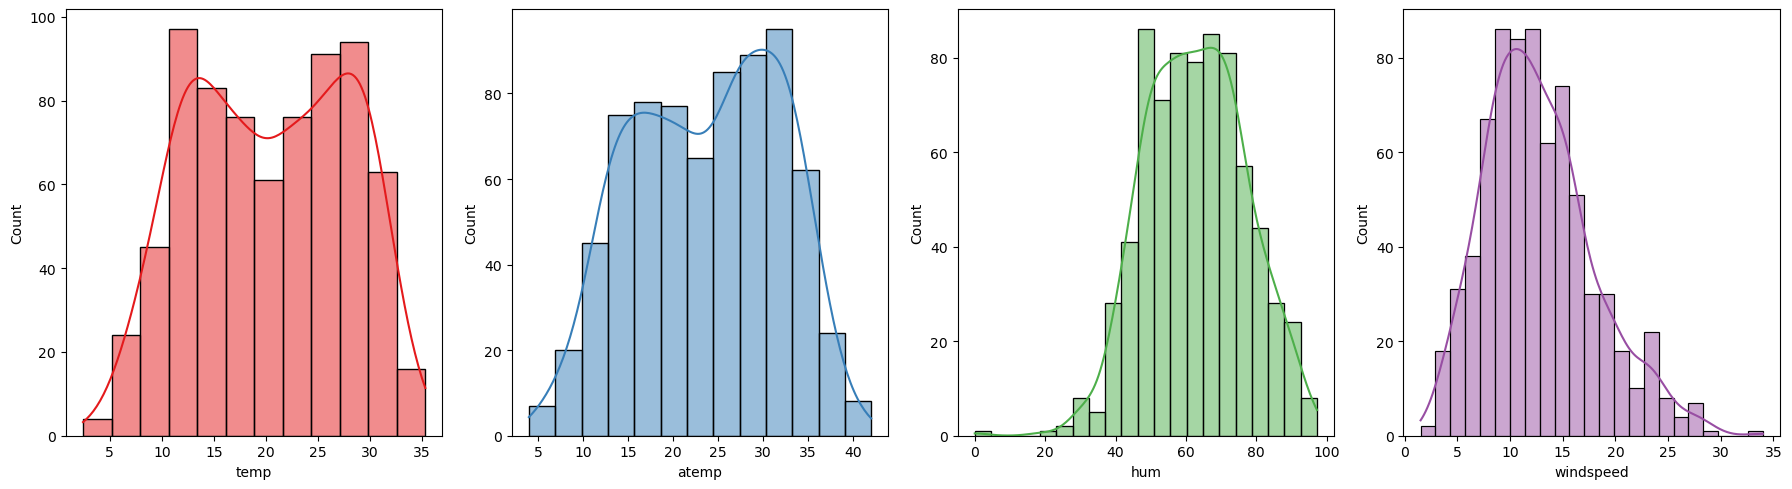

In [55]:
# Exploring Continuous (Numerical) Variables
cont_var = ['temp',	'atemp', 'hum', 'windspeed']
colors = sns.color_palette('Set1', len(cont_var))
fig, ax = plt.subplots(1, 4, figsize = (18, 5))

for i, (var, color) in enumerate(zip(cont_var, colors)):
    sns.histplot(bike_data, x = var, ax= ax[i], kde=True, color=color)
plt.tight_layout()
plt.show()

#### **Inferences**
-  While actual temperature shows distinct preference peaks, its bimodal distribution suggests it might be a less reliable direct predictor of rental volume due to the presence of those distinct groups or preferences.
- Perceived temperature seems to have a more direct positive correlation with rentals compared to actual temperature.
- Moderate humidity levels appear to be optimal for bike rentals, with both low and high humidity potentially discouraging use.
- Lower to moderate wind speeds are associated with higher rental counts, while very windy conditions likely deter riders.

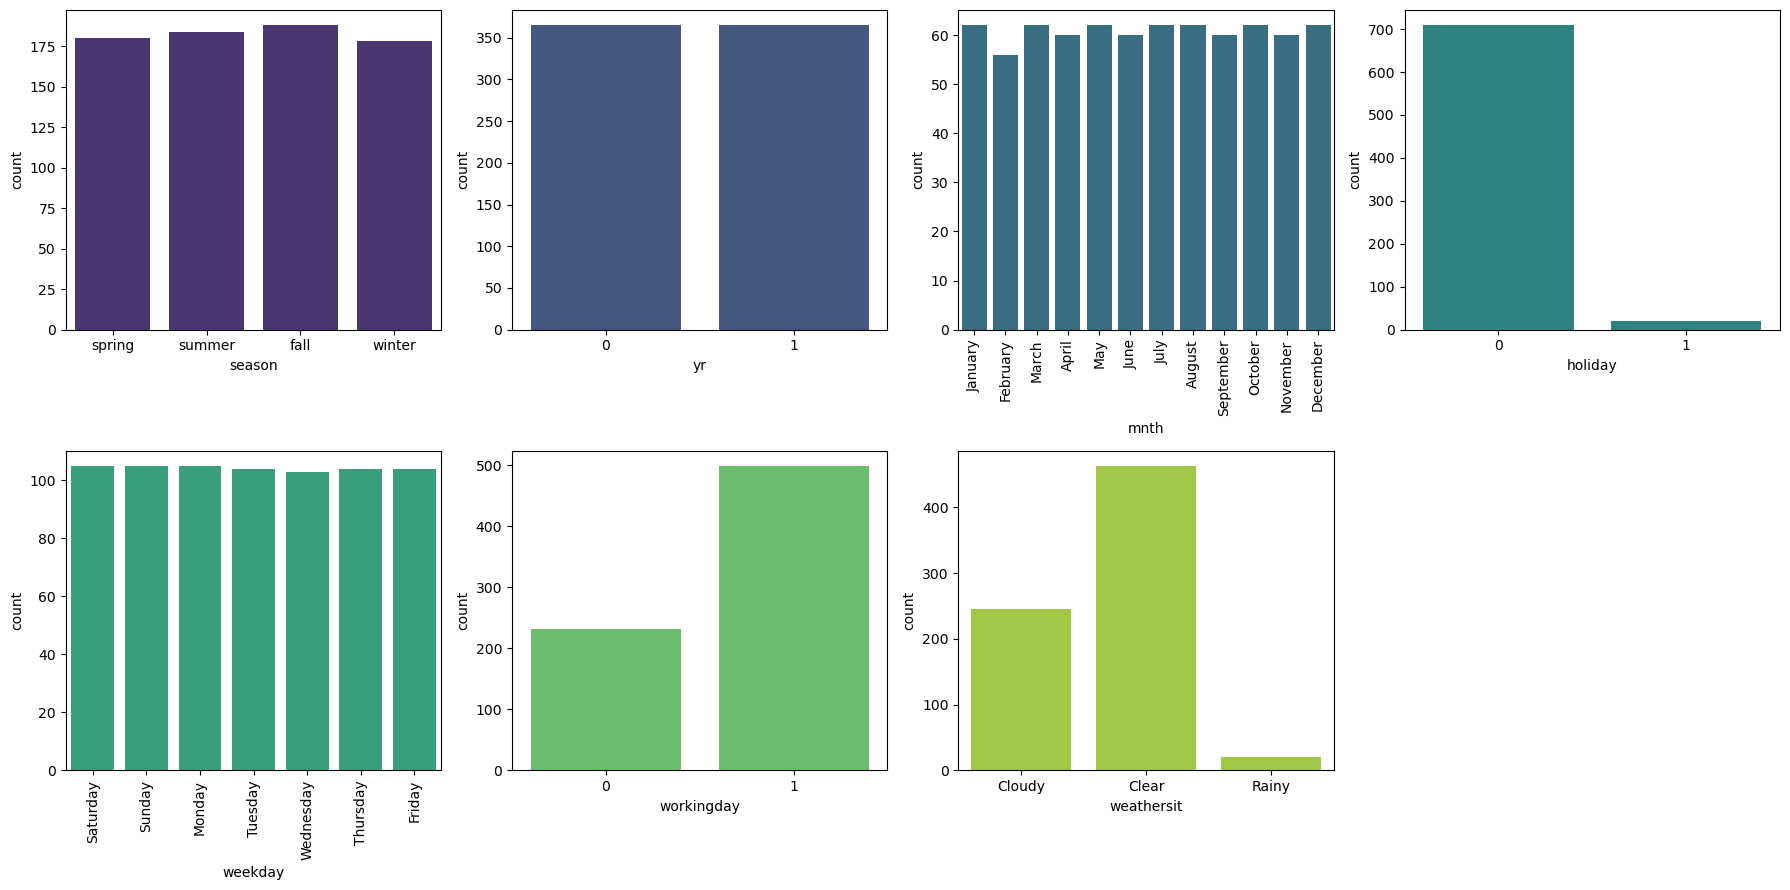

In [57]:
# Exploring Categorical Variables
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, ax = plt.subplots(2, 4, figsize=(18, 9))
colors = sns.color_palette('viridis', len(cat_var))

for i, (var, color) in enumerate(zip(cat_var, colors)):
    curr_ax = ax[i//4, i%4]
    rotation = 90 if var in ['mnth', 'weekday'] else 0

    sns.countplot(bike_data, x=var, ax=curr_ax, color=color)
    curr_ax.set_xticklabels(curr_ax.get_xticklabels(), rotation=rotation)
    
# Hide the unused subplot
ax[1,3].axis('off')

plt.tight_layout()
plt.show()

#### **Inferences:**
- A noticeable preference for bike rentals is evident on working days and non-holidays, likely driven by commuters.
- Bike rentals tend to be more frequent during favorable weather conditions, indicating a clear preference among users for renting bikes when the weather is clear.
- Other categorical variables show minimal variation in bike rental patterns across their respective categories, suggesting limited influence on rental frequency.

### Bivariate Analysis

#### Create a pairplot to visualize the relationships between continuous independent numeric variables and the dependent variable cnt

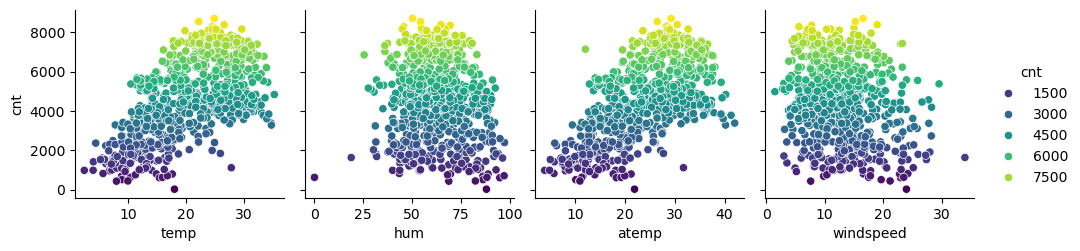

In [61]:
# Create a pairplot to visualize the relationships between continuous independent numeric variables and the dependent variable cnt
cont_bivar = ['temp', 'hum', 'atemp', 'windspeed']
sns.pairplot(bike_data, x_vars=cont_bivar, y_vars='cnt', hue='cnt', palette='viridis')
plt.show()

#### Analyze the correlation between numerical variables

,temp,hum,atemp,windspeed,cnt
temp,1.000000,0.128565,0.991696,-0.158186,0.627044
hum,0.128565,1.000000,0.141512,-0.248506,-0.098543
atemp,0.991696,0.141512,1.000000,-0.183876,0.630685
windspeed,-0.158186,-0.248506,-0.183876,1.000000,-0.235132
cnt,0.627044,-0.098543,0.630685,-0.235132,1.000000


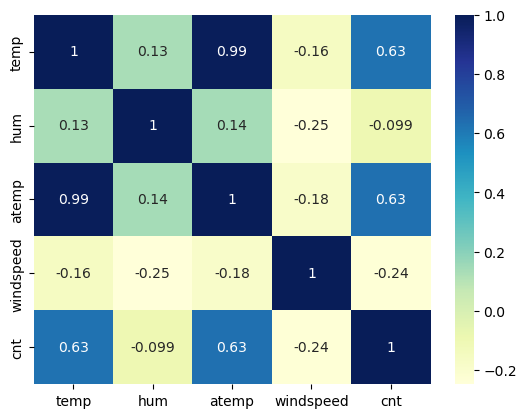

In [64]:
# Analyze the correlation between numerical variables
correlation_matrix = bike_data[cont_bivar+['cnt']].corr()
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True)
correlation_matrix

#### **Observations:**

1. **Temperature (`temp`, `atemp`)**:
   - Strong correlation between `temp` and `cnt` (**0.627**) and `atemp` and `cnt` (**0.631**) indicates higher temperatures increase bike rentals.
   - `temp` and `atemp` are highly correlated (**0.992**), suggesting redundancy.

2. **Humidity (`hum`)**:
   - Weak negative correlation with `cnt` (**-0.099**), showing minimal impact on bike rentals.

3. **Windspeed**:
   - Negative correlation with `cnt` (**-0.235**), suggesting higher wind speeds slightly reduce rentals.

4. **Model Implications**:
   - Use either `temp` or `atemp` to avoid multicollinearity.

#### Visualize the relationship between categorical variables and the dependent variable cnt using boxplots

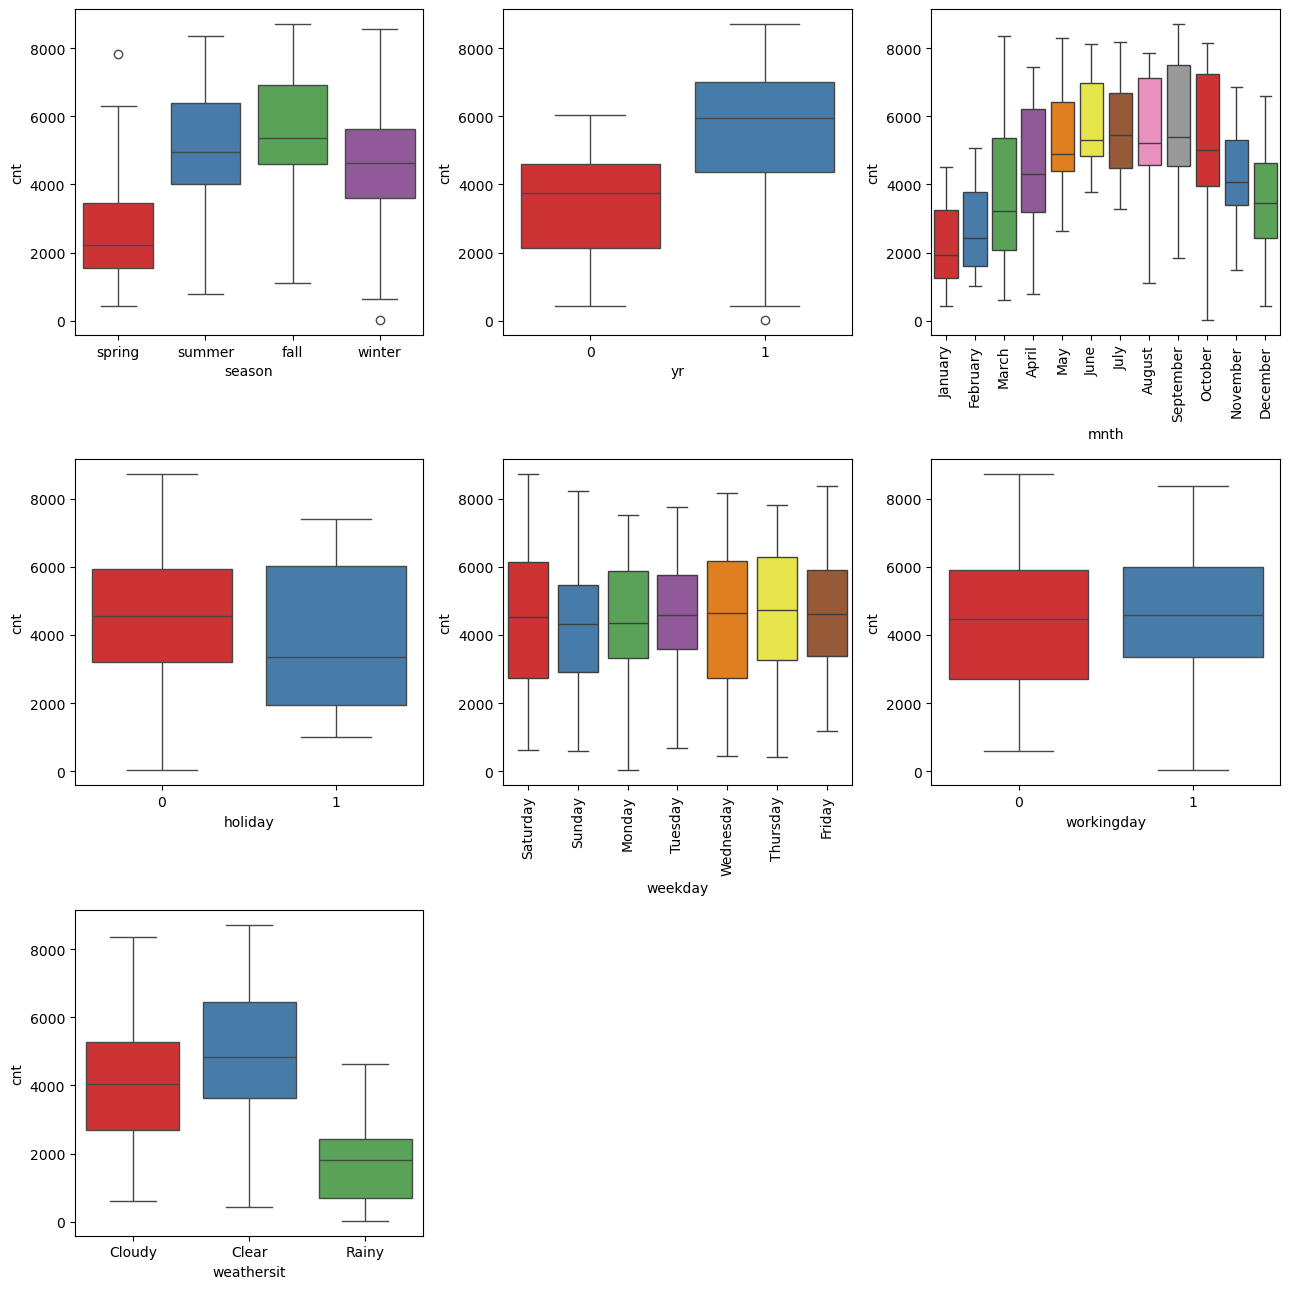

In [67]:
# Visualize the relationship between categorical variables and the dependent variable cnt using boxplots
cat_bivar = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
fig, ax = plt.subplots(3,3, figsize=(13,13))

for i, var in enumerate(cat_bivar):
    curr_ax = ax[i//3, i%3]
    rotation = 90 if var in ['mnth', 'weekday'] else 0
    sns.boxplot(bike_data, x=var, y='cnt', ax=curr_ax, palette='Set1')
    curr_ax.set_xticklabels(curr_ax.get_xticklabels(), rotation = rotation)

# Hide the unused subplots
ax[2,1].axis('off')
ax[2,2].axis('off')

plt.tight_layout()
plt.show()

#### **Inferences:**
- Bike rentals were slightly higher during the Fall season compared to Summer.
- 2019 experienced higher bike rentals overall than 2018.
- Peak rental activity was observed between June and September.
- Rentals were more frequent on non-holidays and working days.
- The highest number of bike rentals occurred during clear weather conditions.

## Data Preparation

### Creating Dummy Variables with One-Hot Encoding for Categorical Variables (Including Derived Metrics)

##### Check the unique values in categorical columns to determine if dummy variables are needed. Dummy variables are required only for categorical columns with more than 2 unique values

In [72]:
#Review bike_data.head() and bike_data.columns to identify and select categorical columns for potential dummy variable creation.
print('Columns: ', bike_data.columns.values)
bike_data.head()

Columns:  ['season' 'yr' 'mnth' 'holiday' 'weekday' 'workingday' 'weathersit' 'temp'
 'atemp' 'hum' 'windspeed' 'cnt']


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [73]:
# Potential columns are
potential_cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [74]:
# Now, we'll examine the unique values in these columns.
bike_data[potential_cat_cols].nunique().sort_values(ascending=False)

mnth          12
weekday        7
season         4
weathersit     3
yr             2
holiday        2
workingday     2
dtype: int64

##### Among the above variables, only the categorical columns - `season`, `mnth`, `weekday`, and `weathersit` - contain more than two unique values. Dummy variables will be created specifically for these columns.

In [76]:
# For these four categorical variables with 'n' unique levels, 'n-1' dummy variables will be created by dropping the first category in each column.
dummies = pd.get_dummies(bike_data[['season', 'mnth', 'weekday', 'weathersit']], drop_first=True, prefix = '', prefix_sep = '', dtype=int)
# Verify the created dummy variables
dummies.columns

Index(['spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'Rainy'],
      dtype='object')

In [77]:
bike_data = pd.concat([bike_data, dummies], axis=1)
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rainy
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Cloudy,10.420847,11.33210,65.2917,...,0,0,0,0,0,1,0,0,1,0
726,spring,1,December,0,Friday,1,Cloudy,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,1,0
727,spring,1,December,0,Saturday,0,Cloudy,10.386653,12.12000,75.2917,...,0,0,0,1,0,0,0,0,1,0
728,spring,1,December,0,Sunday,0,Clear,10.489153,11.58500,48.3333,...,0,0,0,0,1,0,0,0,0,0


In [78]:
# Drop the variables 'season', 'mnth', 'weekday', and 'weathersit' as we have created dummies for them
bike_data.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
# Reviewing the columns in the dataframe
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy', 'Rainy'],
      dtype='object')

#### Analyzing the correlation between these variables and the dependent variable using a correlation matrix and heatmap

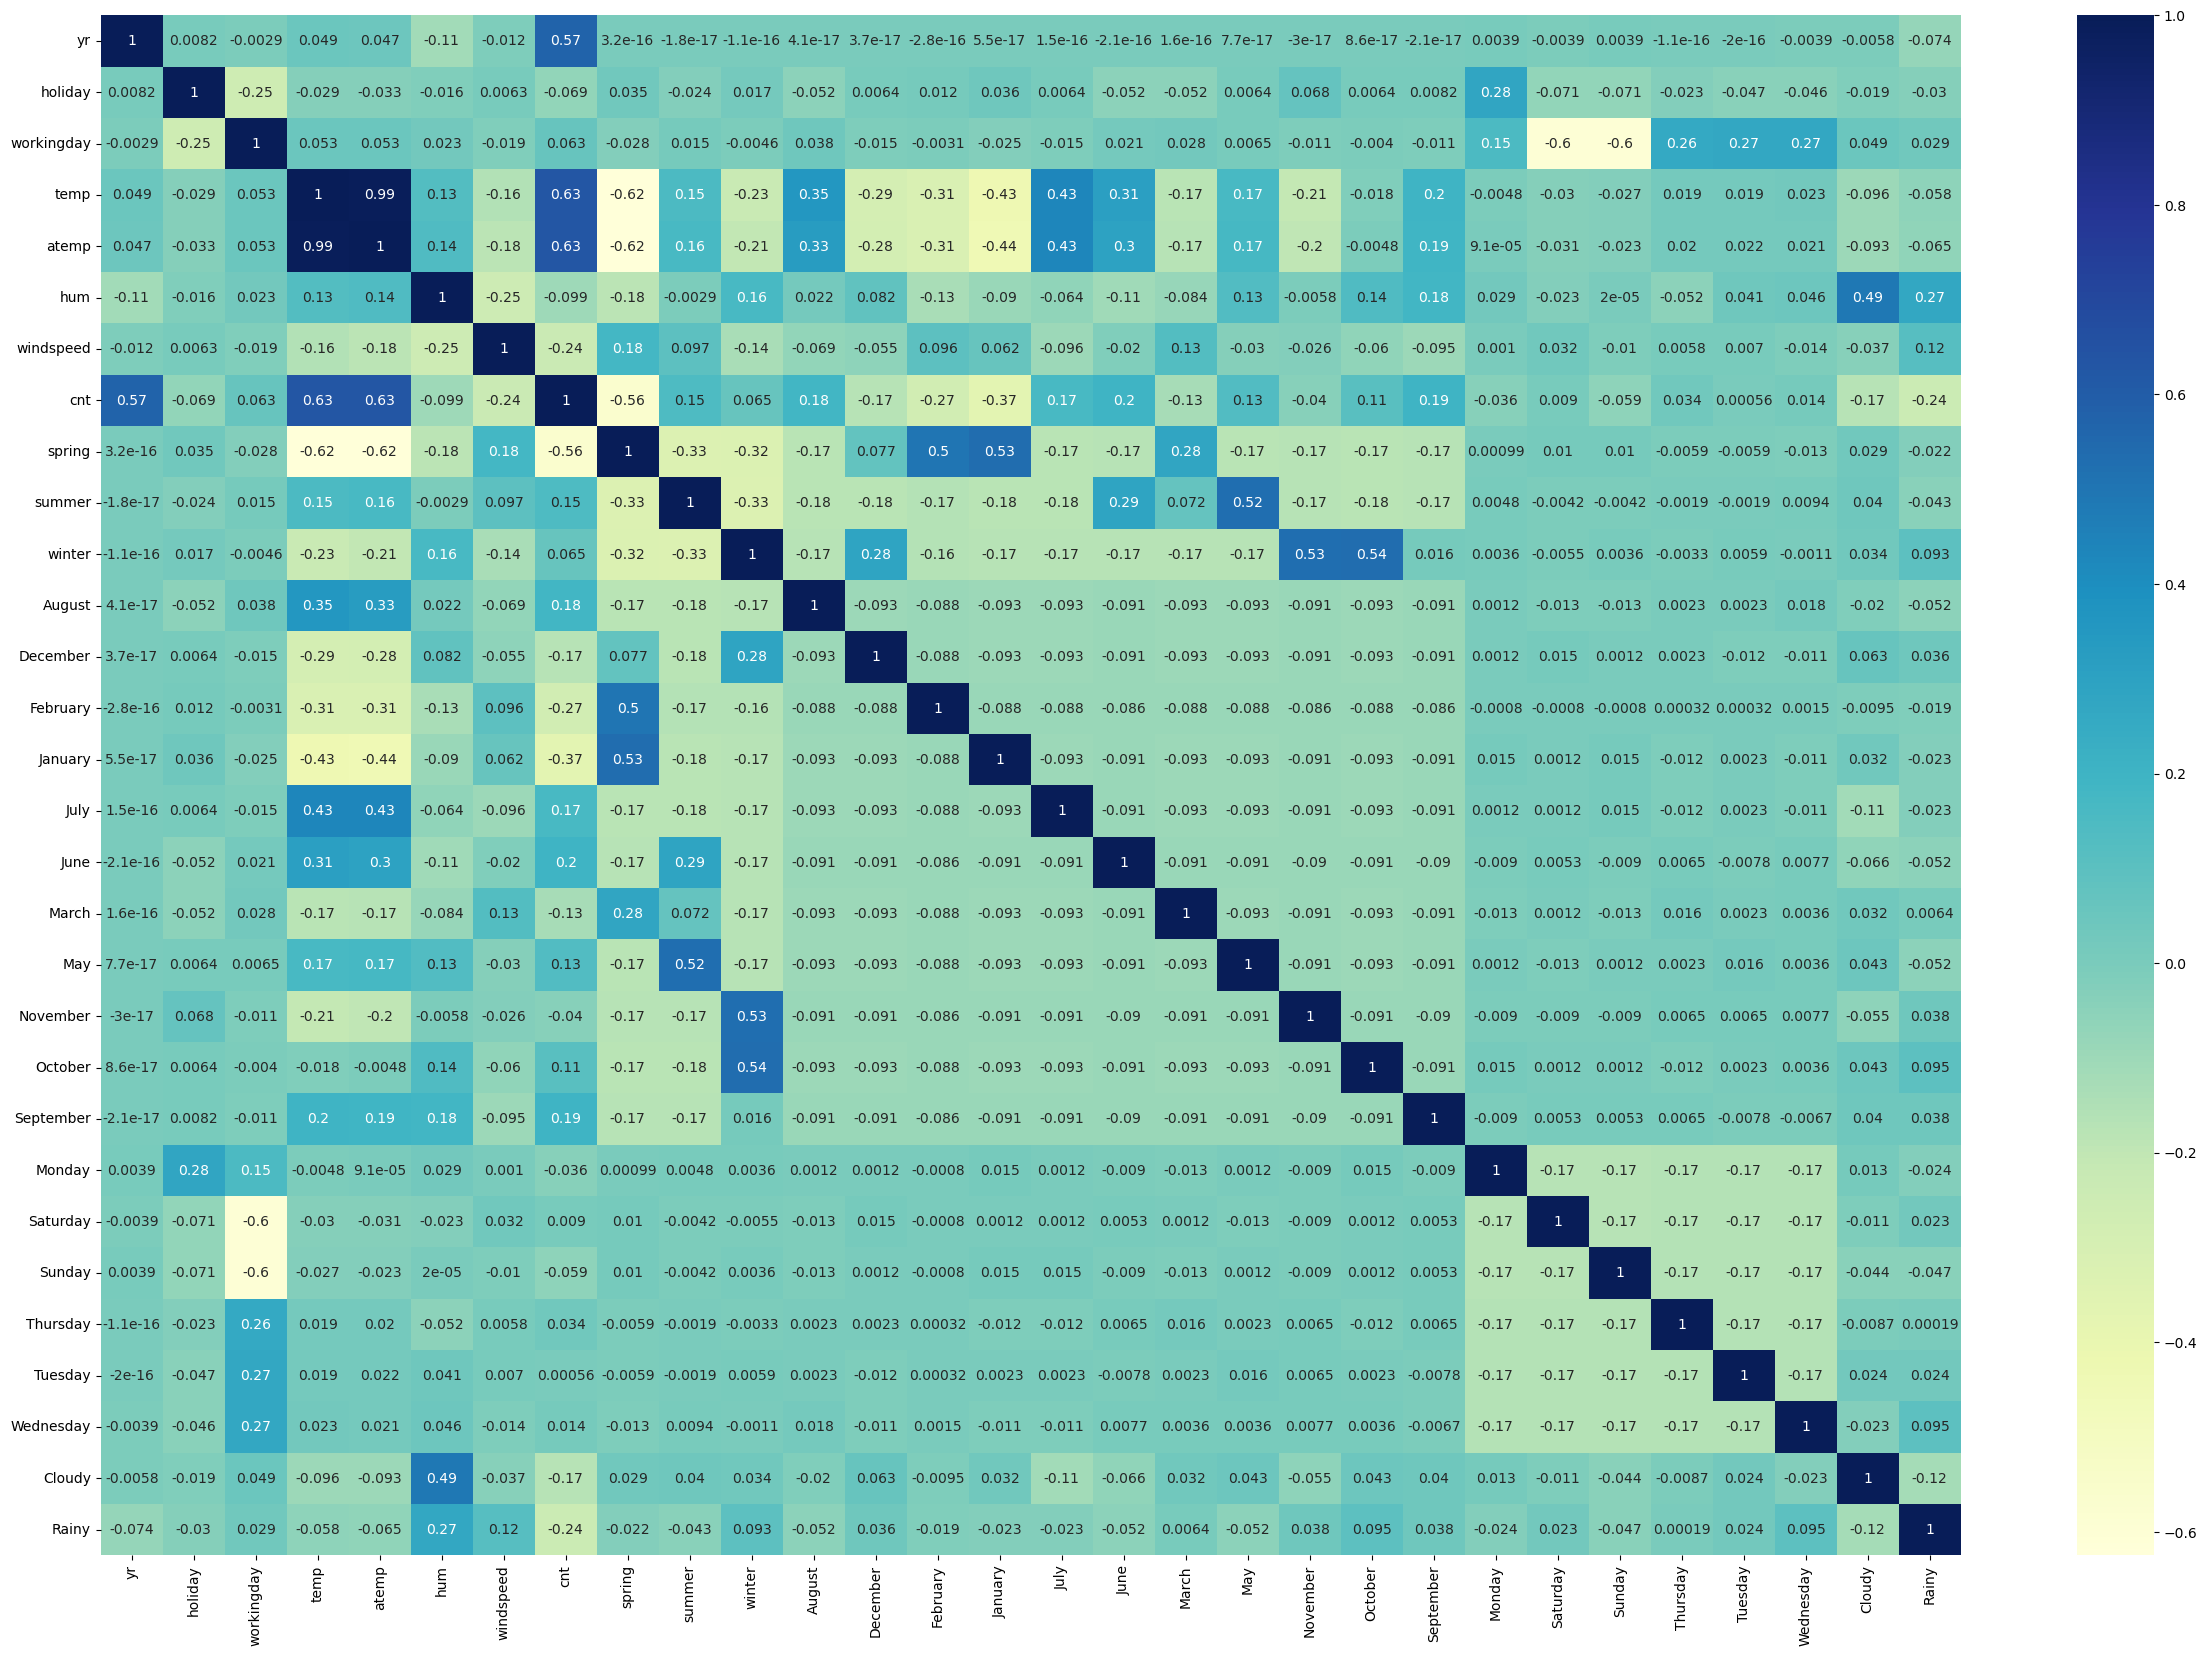

In [81]:
plt.figure(figsize = (30, 20))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### The bike dataframe prepared for model building consists of 730 rows and 30 columns.

In [83]:
bike_data.shape

(730, 30)

## **Step 3: Model Building and Evaluation**

### Dividing the feature variables into X and the dependent variable `cnt` (target variable) into y

In [86]:
y = bike_data.pop('cnt')
X = bike_data

### Splitting the Data into Training and Testing Sets

In [88]:
# Dividing the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
# Verifying the shape and size of the training and test sets
print('X_train:', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

X_train: (510, 29)
X_test:  (219, 29)
y_train: (510,)
y_test:  (219,)


In [90]:
# Viewing the first few rows of the X training set
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rainy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,1,0,0,0,0,1,0


### Applying Feature Scaling with StandardScaler

`StandardScaler` is a preprocessing technique that transforms the features of a dataset to have a mean of 0 and a standard deviation of 1. This ensures that all features are on a consistent scale, which is particularly important for machine learning algorithms that are sensitive to the magnitude of features.

In [93]:
# Apply StandardScaler to standardize feature values
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Fit and transform the training dataset
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Assign the scaled version of X_train to X_train_scaled
X_train_scaled = X_train

# Apply transformation only to the test dataset
X_test[num_vars] = scaler.transform(X_test[num_vars])

# Assign the scaled version of X_test to X_test_scaled
X_test_scaled = X_test

In [94]:
# Viewing the first few rows of the Scaled X training set
X_train_scaled.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rainy
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [95]:
# Viewing summary statistics of the Scaled X training set
X_train_scaled.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Rainy
count,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,-2.385891e-16,4.231909e-16,-3.831358e-16,-2.263984e-16,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


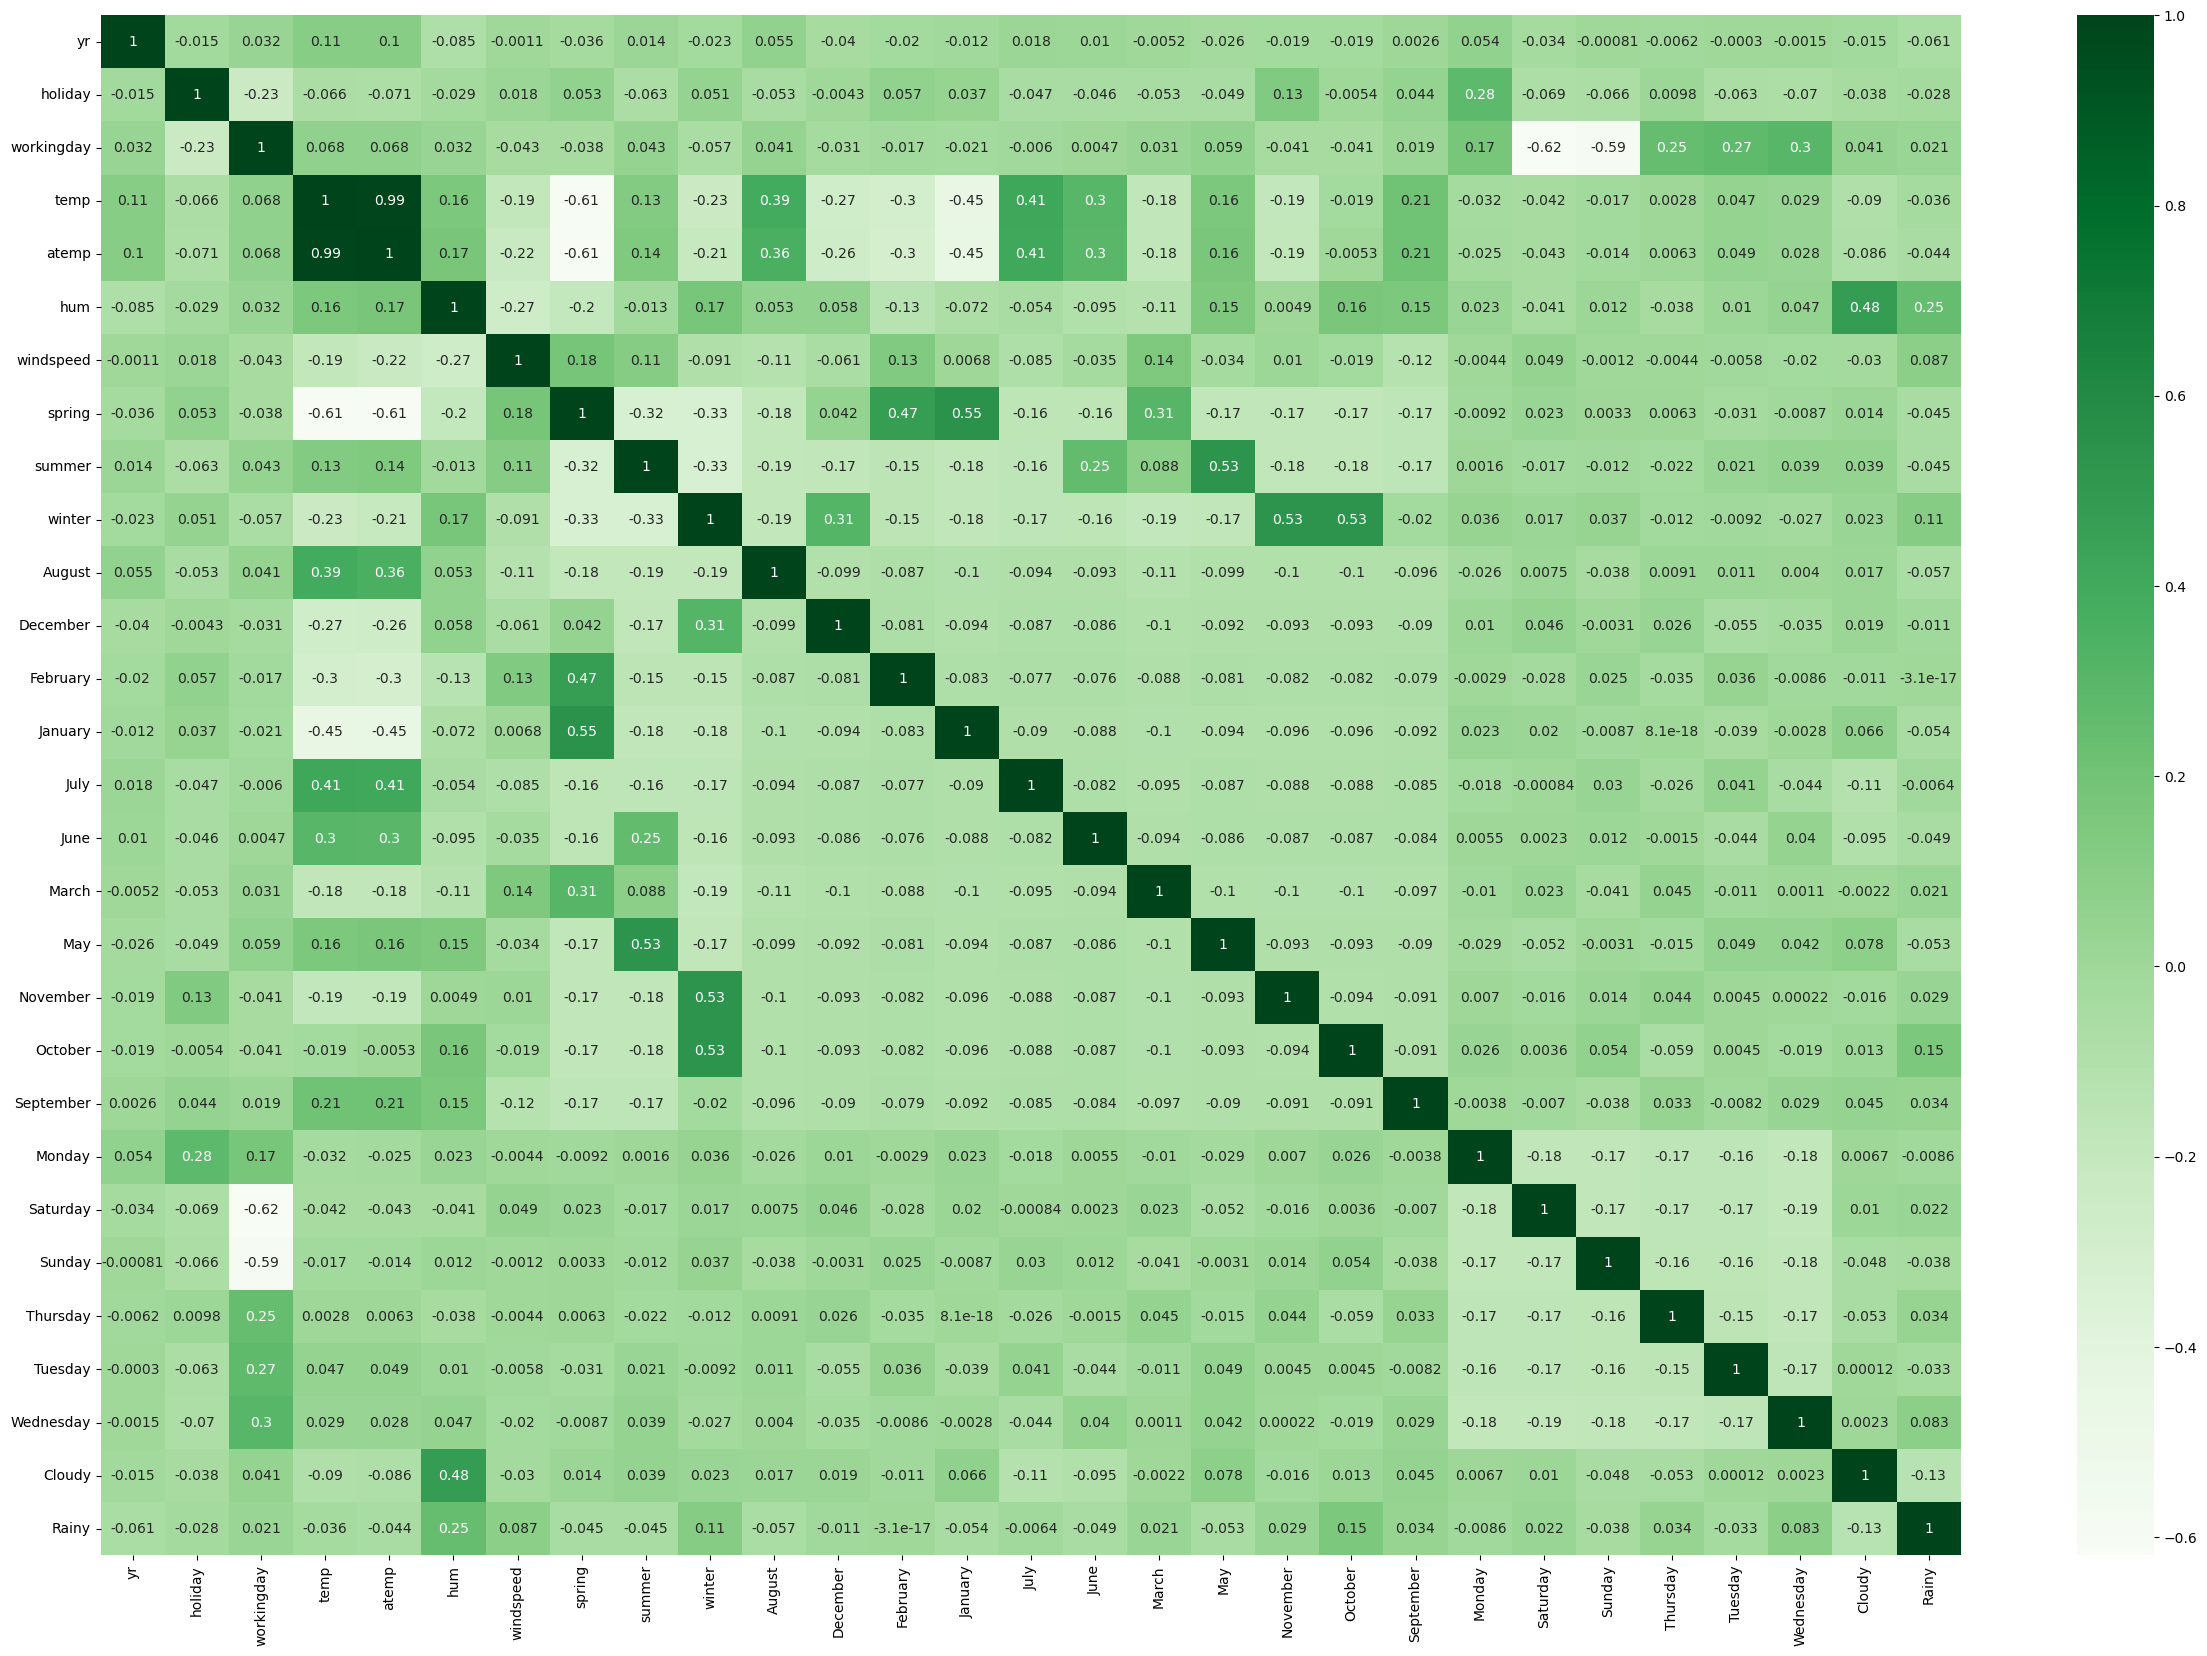

In [96]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(30,20))
sns.heatmap(X_train_scaled.corr(), cmap='Greens', annot=True)
plt.show()

- `January` is strongly correlated with `Spring`.
- `May` exhibits a correlation with `Summer`.
- `November` and `October` show a strong correlation with `Winter`.
- Humidity (`hum`) exhibits a positive correlation with `Cloudy` weather conditions.
- Temperature (`temp`) and feeling temperature (`atemp`) are highly correlated, indicating redundancy.

## Feature Selection using the Recursive Feature Elimination (RFE) method

**`Recursive Feature Elimination (RFE)`** is a powerful feature selection technique that recursively removes the least important features based on model performance. It works by fitting a model and ranking the features according to their importance, eliminating the least important ones iteratively. This method is particularly useful when we want to reduce model complexity and improve performance by selecting only the most relevant features, ensuring a more efficient and interpretable model.

#### Selecting the top 15 features identified through RFE

In [101]:
# Executing RFE to select 15 features
lrm = LinearRegression()
rfe = RFE(lrm, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

In [102]:
rfe.support_

array([ True,  True,  True,  True, False, False, False,  True, False,
        True, False,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
        True,  True])

In [103]:
# Combining feature names with RFE support and ranking to display which features are selected and their rankings
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', False, 5),
 ('windspeed', False, 3),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('August', False, 6),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 4),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 12),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 ('Cloudy', True, 1),
 ('Rainy', True, 1)]

In [104]:
# Verifying the Features Selected by the RFE Method
selected_features = X_train_scaled.columns[rfe.support_]
print('Selected Features:', selected_features.values)

Selected Features: ['yr' 'holiday' 'workingday' 'temp' 'spring' 'winter' 'December'
 'February' 'January' 'July' 'November' 'September' 'Saturday' 'Cloudy'
 'Rainy']


In [105]:
# Verifying the Features Rejected by the RFE Method
rejected_features = X_train_scaled.columns[~rfe.support_]
print('Rejected Features:', rejected_features.values)

Rejected Features: ['atemp' 'hum' 'windspeed' 'summer' 'August' 'June' 'March' 'May'
 'October' 'Monday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


##### Observation:
Despite the bimodal distribution of `temp` (actual temperature) and the higher correlation of `atemp` (perceived temperature) with the target variable, RFE has selected `temp` over `atemp`, suggesting that the model finds actual temperature (`temp`) more predictive in the context of the features available. The correlation observed in the data might be overshadowed by other factors influencing rental volume in the model.

### Common Functions
Reusable Python functions designed for modeling and calculating VIF.

In [108]:
def fit_ols_model(X_train, y_train):
    """
    Fits an Ordinary Least Squares (OLS) regression model, prints the model summary,
    and returns a dictionary with the fitted model and the features including a constant term.

    Parameters:
    - X_train (DataFrame): Features for training.
    - y_train (Series): Target variable for training.

    Returns:
    dict: Contains the fitted OLS model ('model') and the features with an added constant ('X_train_sm').
    """
    X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())
    return {'model': model, 'X_train_sm': X_train_sm}

In [109]:
def calculate_vif(X_train):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in the dataset.

    VIF quantifies the inflation in variance of the estimated regression coefficients 
    due to collinearity with other features. High VIFs indicate high multicollinearity.

    Parameters:
    - X_train (DataFrame): The feature set for which VIFs will be calculated.

    Returns:
    DataFrame: A DataFrame containing the VIF for each feature.
    """
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)  # Round the VIF values for better readability
    vif = vif.sort_values(by="VIF", ascending=False)  # Sort by VIF values in descending order
    return vif

### Manual Feature Elimination using statsmodels and Variance Inflation Factor (VIF).

**Steps for Manual Feature Elimination:**

- **Multicollinearity**: Identify and address high correlations between features to prevent redundancy and ensure stable model estimates.
- **Overfitting**: Mitigate the risk of overfitting by avoiding the model's reliance on noise or outliers in the data.
- **Interpretability**: Simplify the model by eliminating unnecessary features, making it easier to interpret and communicate insights.
- **Data Quality**: Remove irrelevant, redundant, or highly correlated features to maintain cleaner, more reliable data.
- **Model Performance**: Enhance computational efficiency and improve the model's ability to generalize by reducing the number of features.

Manual feature elimination involves identifying features with **p-values greater than 0.05**, indicating statistical insignificance, and **VIF values exceeding 5**, which signal high multicollinearity.

### Model 1
#### Building the initial model using the features selected through the RFE method.

In [113]:
X_train_rfe_1 = X_train_scaled[selected_features]

fit_ols_model(X_train_rfe_1, y_train)
calculate_vif(X_train_rfe_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.70e-181
Time:                        19:38:09   Log-Likelihood:                -4130.7
No. Observations:                 510   AIC:                             8293.
Df Residuals:                     494   BIC:                             8361.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3604.6013    120.095     30.015      0.0

,Features,VIF
4,spring,4.12
3,temp,3.11
2,workingday,2.83
5,winter,2.74
8,January,2.41
7,February,1.95
0,yr,1.90
10,November,1.89
6,December,1.68
13,Cloudy,1.52


### Model 2

#### Excluding `February` from the model due to its relatively high p-value of 0.113, which suggests that its contribution to predicting the target variable is statistically insignificant.

In [116]:
X_train_rfe_2 = X_train_rfe_1.drop(['February'], axis = 1)
fit_ols_model(X_train_rfe_2, y_train)
calculate_vif(X_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.47e-181
Time:                        19:38:10   Log-Likelihood:                -4132.0
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     495   BIC:                             8358.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3590.4972    119.950     29.933      0.0

,Features,VIF
4,spring,3.08
3,temp,2.98
2,workingday,2.82
5,winter,2.73
0,yr,1.89
9,November,1.85
7,January,1.74
6,December,1.55
12,Cloudy,1.52
11,Saturday,1.42


### Model 3

#### Removing the `holiday` variable from the model due to its relatively high p-value of 0.068, indicating that it does not significantly contribute to predicting the target variable.

In [119]:
X_train_rfe_3 = X_train_rfe_2.drop(['holiday'], axis = 1)
fit_ols_model(X_train_rfe_3, y_train)
calculate_vif(X_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.55e-182
Time:                        19:38:10   Log-Likelihood:                -4133.7
No. Observations:                 510   AIC:                             8295.
Df Residuals:                     496   BIC:                             8355.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3528.8236    115.387     30.582      0.0

,Features,VIF
3,spring,2.99
2,temp,2.95
4,winter,2.71
1,workingday,2.69
0,yr,1.88
8,November,1.82
6,January,1.74
5,December,1.54
11,Cloudy,1.52
10,Saturday,1.39


### Model 4

#### Removing the `January` variable from the model as its marginal p-value of 0.029 suggests a limited contribution to predicting the target variable, making it a candidate for exclusion to streamline the model.

In [122]:
X_train_rfe_4 = X_train_rfe_3.drop(['January'], axis = 1)
fit_ols_model(X_train_rfe_4, y_train)
calculate_vif(X_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.13e-182
Time:                        19:38:10   Log-Likelihood:                -4136.2
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3514.9793    115.654     30.392      0.0

,Features,VIF
2,temp,2.75
3,spring,2.73
4,winter,2.71
1,workingday,2.68
0,yr,1.88
7,November,1.80
10,Cloudy,1.52
5,December,1.47
9,Saturday,1.38
6,July,1.37


### Model 5

#### Excluding the `December` variable from the model due to its marginal p-value of 0.044, indicating that its contribution to predicting the target variable is statistically weak and may not provide substantial predictive value. Removing it can help simplify the model without compromising its overall performance.

In [125]:
X_train_rfe_5 = X_train_rfe_4.drop(['December'], axis = 1)
fit_ols_model(X_train_rfe_5, y_train)
calculate_vif(X_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.06e-182
Time:                        19:38:11   Log-Likelihood:                -4138.3
No. Observations:                 510   AIC:                             8301.
Df Residuals:                     498   BIC:                             8351.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3498.2497    115.712     30.232      0.0

,Features,VIF
3,spring,2.73
1,workingday,2.65
2,temp,2.65
4,winter,2.28
0,yr,1.88
6,November,1.56
9,Cloudy,1.52
8,Saturday,1.37
5,July,1.36
7,September,1.18


### Model 6

#### Excluding the `November` variable from the model due to its marginal p-value of 0.044, which suggests a weak contribution to predicting the target variable. Removing it simplifies the model without significantly affecting its overall performance.

In [128]:
X_train_rfe_6 = X_train_rfe_5.drop(['November'], axis = 1)
finalized_lr_model = fit_ols_model(X_train_rfe_6, y_train)
calculate_vif(X_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          9.84e-183
Time:                        19:38:11   Log-Likelihood:                -4140.4
No. Observations:                 510   AIC:                             8303.
Df Residuals:                     499   BIC:                             8349.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3477.1925    115.597     30.080      0.0

,Features,VIF
3,spring,2.71
1,workingday,2.65
2,temp,2.62
0,yr,1.88
4,winter,1.81
8,Cloudy,1.52
7,Saturday,1.37
5,July,1.36
6,September,1.17
9,Rainy,1.07


### Based on **`Model 6`**, the final evaluation model, the following conclusions can be drawn:

1. **Model Performance**: The model has a high R-squared value of 0.827, indicating that 82.7% of the variance in the target variable is explained by the model. The Adjusted R-squared of 0.823 accounts for the number of predictors, reinforcing the robustness of the model.

2. **Statistical Significance**: The F-statistic of 238.0 and its extremely low p-value (Prob (F-statistic)) of 9.84e-183 suggest that the overall model is statistically significant, and the predictors collectively contribute to explaining the target variable.

3. **Feature Significance**: All features have a p-value of zero, indicating they are statistically significant predictors of the target variable.

4. **Multicollinearity**: The Variance Inflation Factor (VIF) for all features is below 5, and specifically below 2.72, indicating that multicollinearity is not an issue. This low VIF further enhances the model's reliability and ensures that the features are not highly correlated, contributing to more stable coefficient estimates.

5. **Model Simplicity and Reliability**: The model has been carefully simplified, with features selected based on statistical significance, low VIFs, and meaningful contribution to the target prediction. This simplification has enhanced model interpretability without compromising predictive accuracy.

**This model serves as the final evaluation model due to its high explanatory power, statistical significance, efficient feature selection, and low multicollinearity, making it a reliable and performant choice for further analysis and application.**

**We will now assess its performance on the training set to confirm its effectiveness.**

## Model Evaluation

### Residual Analysis

In [132]:
# Retrieve the final model and X_train_sm from the finalized_lr_model
model, X_train_sm = finalized_lr_model.values()

In [133]:
# Predict the target values (y_train_pred) for the training set using the model.
y_train_pred = model.predict(X_train_sm)

**Linear regression models rely on several fundamental assumptions:**

1. **Linearity**: A linear relationship should exist between the independent variables (predictors) and the dependent variable (target), meaning that changes in the target variable are proportionate to changes in the predictor variables.
   
2. **Independence**: The residuals (errors) must be independent, with no correlation between them.
   
3. **Homoscedasticity**: The variance of residuals should remain constant across all levels of the independent variables, ensuring the error spread does not increase or decrease as the predictor variables change.
   
4. **Normality of Residuals**: Residuals (Error terms are) normally distributed with mean zero.
   
5. **No Perfect Multicollinearity**: The independent variables should not exhibit high correlation with each other. Presence of multicollinearity can lead to instability in the model’s coefficient estimates, making them unreliable.

Failure to meet these assumptions can impact the accuracy and reliability of the linear regression model. Therefore, diagnostic checks are commonly conducted to evaluate whether these assumptions hold true.

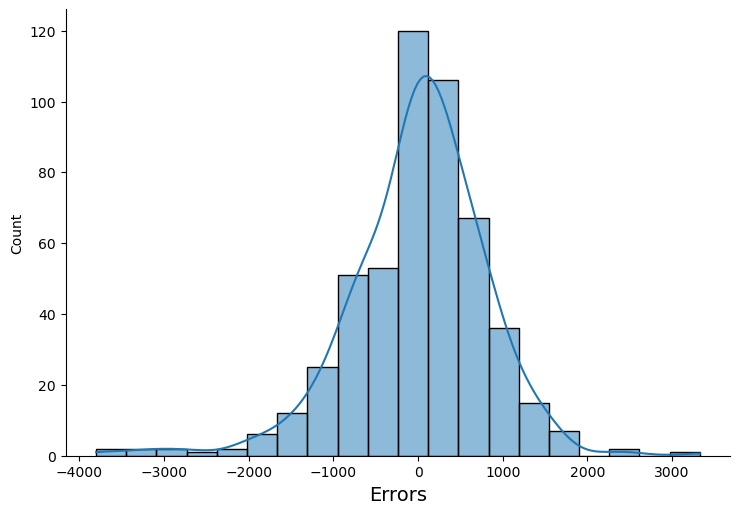

In [135]:
# Plot the histogram of the error terms on the training set

# Calculate residuals
residuals = y_train - y_train_pred

# Plot the residuals
sns.displot(residuals, bins=20, kde=True, aspect=1.5, height=5)
plt.xlabel('Errors', fontsize=14)
plt.show()

- **The error terms adhere to the assumption of a normal distribution, with the pattern closely resembling a bell curve. This suggests that the residuals are symmetrically distributed around a mean of zero, which is crucial for the validity of the linear regression model.**

### Homoscedasticity

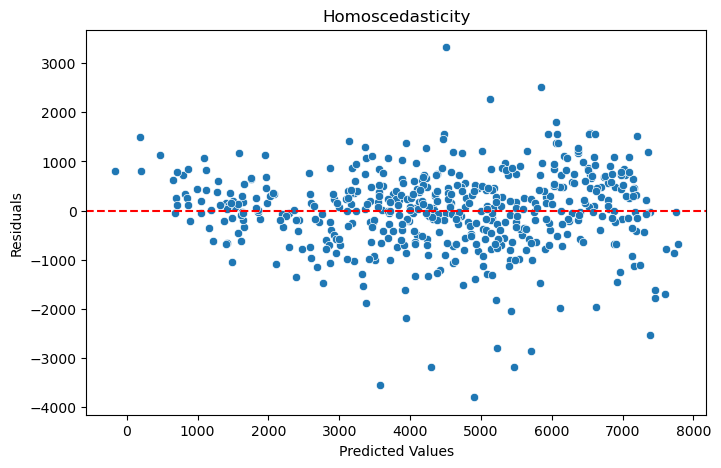

In [138]:
# Visualize Homoscedasticity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()

- **Based on the visualization, the residuals display a constant variance across all levels of the independent variables, suggesting that the variability remains consistent throughout the model. This indicates that homoscedasticity holds true, supporting the assumption of constant error variance in the linear regression model.**

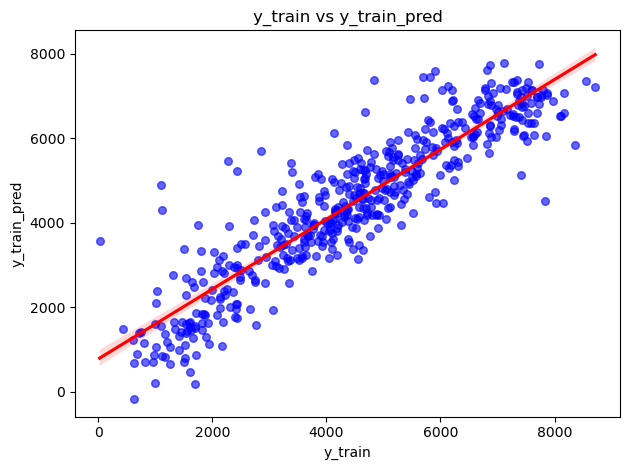

In [140]:
# Create a regression plot to visualize the relationship between true and predicted values
sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'}, scatter_kws={'s': 30, 'color': 'blue', 'alpha':0.6})

# Set plot title and axis labels
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

# Display the plot
plt.tight_layout()
plt.show()

- The scatter plot reveals a strong positive linear relationship between the actual training values (y_train) and the predicted training values (y_train_pred), suggesting that the model is effectively capturing the general trend of the data and making accurate predictions.

In [142]:
# Compute the Mean Squared Error (MSE) for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# Display the RMSE value
print('rmse_train:', rmse_train)

rmse_train: 811.934865499641


#### **The assumptions of the linear model are satisfied, suggesting that it is well-trained and prepared for testing on the test set.**

### Make Predictions Using the Final Model on the Test Set

In [145]:
# Keep only the features selected in the final model.
X_test_scaled = X_test_scaled[X_train_rfe_6.columns]
X_test_scaled.head()

,yr,workingday,temp,spring,winter,July,September,Saturday,Cloudy,Rainy
184,0,0,1.305371,0,0,1,0,0,1,0
535,1,1,1.613721,0,0,0,0,0,0,0
299,0,1,-0.112129,0,1,0,0,0,1,0
221,0,1,1.526280,0,0,0,0,0,0,0
152,0,1,1.240938,0,0,0,0,0,0,0


In [146]:
# Add constant to the test set
X_test_sm = sm.add_constant(X_test_scaled)

In [147]:
# Generate predictions using the linear model
y_test_pred = model.predict(X_test_sm)

## Computing the R-squared (R²) score for the test set

In [149]:
# Calculate R-squared Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
print('r2_score_test:', r2_score_test)

r2_score_test: 0.81


#### **R-squared (R²) score for the test set is `0.81`**

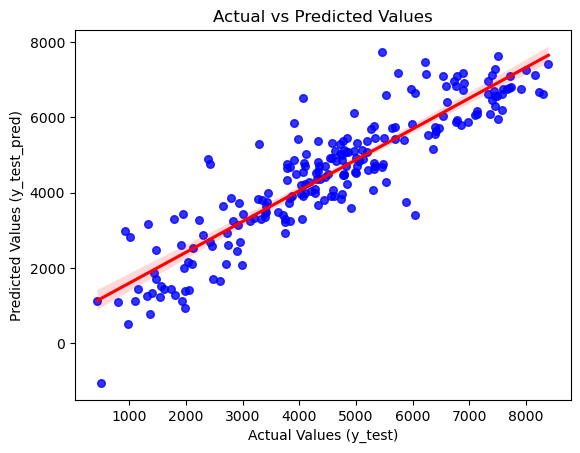

In [151]:
# Create a scatter plot to visualize the predicted values with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = {'color': 'red'}, scatter_kws = {'s': 30, 'color': 'blue'})

# Display the plot with appropriate titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.show()

In [152]:
# Compute the Mean Squared Error (MSE) for the testing set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# Display the RMSE value
print('rmse_test:', rmse_test)

rmse_test: 819.6655909061435


#### **Coefficients of the final model**

In [154]:
round(model.params, 2)

const         3477.19
yr            2027.95
workingday     481.86
temp           923.13
spring        -970.07
winter         491.99
July          -571.82
September      541.30
Saturday       555.89
Cloudy        -703.49
Rainy        -2645.69
dtype: float64

## Equation of the Best-Fit Line

In a multiple linear regression model, the equation of the best-fit line is represented as:

**Y** = β₀ + β₁**X₁** + β₂**X₂** + β₃**X₃** + \dots + βₖ**Xₖ**

Where:
- **Y**: Dependent variable (the variable being predicted), in this case, `cnt`.
- **β₀**: Y-intercept (constant term).
- **β₁, β₂, β₃, ..., βₖ**: Coefficients for the independent variables **X₁, X₂, X₃, ..., Xₖ**, respectively.

The coefficients are determined through a process that minimizes the sum of squared differences between the predicted and actual values. This results in the best linear fit for the data.

For our model, the best-fit line is determined by the following equation:

**cnt** = 3477.19 + 2027.95 x **yr** + 481.86 x **workingday** + 923.13 x **temp** − 970.07 x **spring** + 491.99 x **winter** − 571.82 x **July** + 541.30 x **September** + 555.89 x **Saturday** − 703.49 x **Cloudy** − 2645.69 x **Rainy**

### Comparing R-squared (R²) scores for the training and testing sets

In [157]:
# Compute R-squared Score for the train set
r2_score_train = round(model.rsquared, 2)

# Display R-squared (R²) Score for the training set and testing set
print(f'Training Set: R² score = {r2_score_train}\n Testing Set: R² score = {r2_score_test}')

Training Set: R² score = 0.83
 Testing Set: R² score = 0.81


- **The R² scores for the training and test sets are `0.83` and `0.81`, respectively. The close alignment of these values indicates that the model generalizes well, showing a strong ability to apply what it learned to new data. This suggests that the model is not overfitting to the training data, as it performs consistently across both the training and testing datasets. Such consistency enhances the model's reliability and indicates its potential to make accurate predictions on unseen data.**

## Model Summary, Performance Evaluation, and Conclusion

**Equation of the Best Fit Line:**

The equation representing the best-fit line for predicting bike demand (cnt) is:

**cnt** = 3477.19 + 2027.95 x **yr** + 481.86 x **workingday** + 923.13 x **temp** − 970.07 x **spring** + 491.99 x **winter** − 571.82 x **July** + 541.30 x **September** + 555.89 x **Saturday** − 703.49 x **Cloudy** − 2645.69 x **Rainy**

**Performance Evaluation:**

- **Training Set:** R² score = 0.83
- **Testing Set:** R² score = 0.81
- **RMSE (Training Set):** 811.93
- **RMSE (Test Set):** 819.67 

**Conclusion:**

- The model demonstrates a high degree of accuracy, with **R² scores** of **0.83** for the training set and **0.81** for the testing set. This indicates that the model is able to explain a significant proportion of the variance in both the training and test datasets, showing effective generalization.

- The RMSE values of approximately 811.93 for the training set and 819.67 for the test set further suggest that the model is fitting well to the training data and generalizing reasonably to new, unseen data. The small difference between the training and testing RMSE values indicates that the model is not overfitting and performs consistently on new data.


- Key features influencing bike demand include **'year (yr)'**, **'temperature (temp)'**, **'Saturday'**, **'workingday'**, and seasonal factors like **'winter'**, **'September'**, and **'July'**. Additionally, weather conditions such as **'Cloudy'** and **'Rainy'** also play a role in shaping the demand.  

- Among these, the top three driver variables are **'year (yr)'**, **'temperature (temp)'**, and **'Saturday'**, with **'yr'** and **'temp'** having the highest coefficients, indicating their significant impact on demand predictions.

- Overall, the model exhibits a strong fit, with minimal variance in performance between training and testing, suggesting that it is well-equipped to predict bike demand with reliable accuracy.